# Classifier

In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
set_session(tf.Session(config=config))

Using TensorFlow backend.


## 1. Load DataSet

In [2]:
X_train = []
x_label = []
folder = 'carla'
for img_class, directory in enumerate(['data/{}_red'.format(folder), 'data/{}_yellow'.format(folder), 'data/{}_green'.format(folder), 'data/{}_none'.format(folder)]):
    for i, file_name in enumerate(glob.glob("{}/*.jpg".format(directory))):
        file = cv2.imread(file_name)
        file = cv2.cvtColor(file, cv2.COLOR_BGR2RGB);
        resized = cv2.resize(file, (32,64))
        
        X_train.append(resized/255.)
        x_label.append(img_class)
print('checking datasets and labels in {}'.format(folder))       
X_train = np.array(X_train)
x_label = np.array(x_label)

checking datasets and labels in carla


## 2. Build Model

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from keras.utils.np_utils import to_categorical
from keras import losses, optimizers, regularizers

In [4]:
categorical_labels = to_categorical(x_label) # https://keras.io/utils/#to_categorical
num_classes = 4 # red, yellow, green, none
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3), input_shape=(64, 32, 3), padding='same', activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 16, 16), padding='same', activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(2,2))
Dropout(0.2)
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(num_classes, activation='softmax'))
loss = losses.categorical_crossentropy
optimizer = optimizers.Adam()
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 32, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 8, 32)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               2097664   
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 2052      
Total para

In [6]:
model.fit(X_train, categorical_labels, batch_size=256, epochs=50, verbose=True, validation_split=0.1, shuffle=True)

Train on 407 samples, validate on 46 samples
Epoch 1/50
407/407 [==============================] - 0s 70us/step - loss: 0.0921 - acc: 1.0000 - val_loss: 1.5773 - val_acc: 0.7391
Epoch 2/50
407/407 [==============================] - 0s 72us/step - loss: 0.0988 - acc: 1.0000 - val_loss: 2.4989 - val_acc: 0.5870
Epoch 3/50
407/407 [==============================] - 0s 71us/step - loss: 0.1038 - acc: 0.9902 - val_loss: 1.3148 - val_acc: 0.7826
Epoch 4/50
407/407 [==============================] - 0s 70us/step - loss: 0.1236 - acc: 0.9926 - val_loss: 2.5072 - val_acc: 0.5652
Epoch 5/50
407/407 [==============================] - 0s 78us/step - loss: 0.1139 - acc: 0.9951 - val_loss: 1.7674 - val_acc: 0.6522
Epoch 6/50
407/407 [==============================] - 0s 100us/step - loss: 0.1093 - acc: 1.0000 - val_loss: 2.6079 - val_acc: 0.6522
Epoch 7/50
407/407 [==============================] - 0s 106us/step - loss: 0.1231 - acc: 0.9902 - val_loss: 1.3878 - val_acc: 0.7174
Epoch 8/50
407/407 [==

In [7]:
score = model.evaluate(X_train, categorical_labels, verbose=True)
print(score)

453/453 [==============================] - 0s 80us/step
[0.2831723079512977, 0.9668874172843318]


In [8]:
prediction = model.predict(X_train, verbose=1)
for i in range(len(prediction)):
    print (i, prediction[i], categorical_labels[i])

453/453 [==============================] - 0s 115us/step
0 [9.9331880e-01 7.2106246e-05 8.2304847e-04 5.7860175e-03] [1. 0. 0. 0.]
1 [9.9999154e-01 7.3420415e-06 2.3884621e-07 7.9875650e-07] [1. 0. 0. 0.]
2 [9.9990976e-01 8.0718091e-05 2.2526453e-06 7.3016490e-06] [1. 0. 0. 0.]
3 [9.2687958e-01 6.0733568e-05 2.4716455e-06 7.3057182e-02] [1. 0. 0. 0.]
4 [9.9815601e-01 1.6451859e-03 1.3965940e-04 5.9164729e-05] [1. 0. 0. 0.]
5 [9.9550110e-01 2.8432708e-04 2.6991629e-04 3.9445870e-03] [1. 0. 0. 0.]
6 [9.8582435e-01 1.0124656e-02 3.1559641e-04 3.7354596e-03] [1. 0. 0. 0.]
7 [9.9892622e-01 7.6958130e-04 2.5346884e-07 3.0392729e-04] [1. 0. 0. 0.]
8 [0.9836859  0.00268848 0.00282634 0.01079919] [1. 0. 0. 0.]
9 [9.9244457e-01 7.3076057e-04 4.5258938e-03 2.2987905e-03] [1. 0. 0. 0.]
10 [0.9732862  0.00170126 0.01925029 0.00576223] [1. 0. 0. 0.]
11 [9.8201376e-01 1.7509099e-02 1.0955759e-04 3.6760897e-04] [1. 0. 0. 0.]
12 [9.9847823e-01 1.1226148e-04 1.2753326e-04 1.2820438e-03] [1. 0. 0. 0.]
13

In [9]:
%matplotlib inline
fig = plt.figure()
import operator

LABELS = list(enumerate(['Red', 'Yellow', 'Green', 'None']))

def read_prediction(predictions):
    index, value = max(enumerate(predictions), key=operator.itemgetter(1))
    print('Max prediction score', value)
    print('Predicted label: ', LABELS[index][1])
    
def read_label(example_image_id):
    print(prediction[example_image_id])
    print('Ground truth label: ', print_label(categorical_labels[example_image_id]))
    read_prediction(prediction[example_image_id])
    plt.imshow(X_train[example_image_id])  
    
def print_label(categorical_label):
    color = ''
    for i in range(categorical_label.shape[0]):
        if categorical_label[i] == 1.0:           
            color = LABELS[i][1]
            if color != '': return color
        else:
            color = 'None'
    return color    

<Figure size 432x288 with 0 Axes>

In [10]:
import h5py # needed for model saving
model.save('tl_classifier_{}.h5'.format(folder))

[9.9972504e-01 2.7015366e-04 6.9446992e-07 4.0231125e-06]
Ground truth label:  Red
Max prediction score 0.99972504
Predicted label:  Red


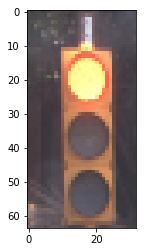

In [11]:
read_label(46)  

[1.4275169e-03 9.9848962e-01 4.3005850e-05 3.9861210e-05]
Ground truth label:  Yellow
Max prediction score 0.9984896
Predicted label:  Yellow


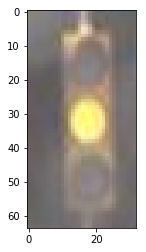

In [12]:
read_label(172)  

[1.0148065e-09 9.0920045e-13 9.9999881e-01 1.1550521e-06]
Ground truth label:  Green
Max prediction score 0.9999988
Predicted label:  Green


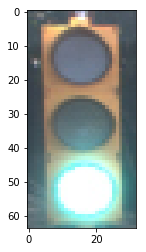

In [13]:
read_label(216)  

[1.0011833e-03 1.3769268e-10 3.5103587e-03 9.9548846e-01]
Ground truth label:  None
Max prediction score 0.99548846
Predicted label:  None


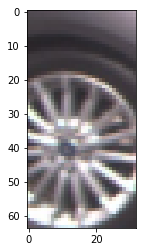

In [14]:
read_label(400)